In contrast to Convolutional Neural Networks, which can be complex and resource-intensive, we have the option of employing DLib and face_recognition libraries for more practical and efficient applications, such as Facial Recognition, Smart Surveillance, and various other real-world scenarios.

These libraries provide a simpler and more accessible approach to achieve accurate facial recognition and surveillance capabilities without the need for extensive computational resources or complex model architectures. With DLib and face_recognition, developers can quickly implement robust facial recognition systems that can be deployed on a wide range of devices, making them ideal for real-time applications and scenarios where efficiency is a crucial factor. Moreover, the ease of use and integration of these libraries allows for rapid development and deployment, making them highly suitable for both professional and hobbyist projects alike.

 I'll break down each part of the code and provide a detailed description of its purpose and functionality:

In [13]:
import face_recognition
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import cv2
from IPython.display import display
import numpy as np

The import statements bring in necessary libraries for the facial recognition task:
- `face_recognition` is a popular Python library that wraps around the `Dlib` library and provides face detection and recognition functionalities.
- `os` is a standard library for interacting with the operating system, used here to work with file paths.

In [4]:
def load_face_data(folder):
    images = []

    for filename in os.listdir(folder):
        try:
            img_path = os.path.join(folder, filename)
            image = face_recognition.load_image_file(img_path)
            pil_image = Image.fromarray(image)
            d = ImageDraw.Draw(pil_image)
            face_landmarks_list = face_recognition.face_landmarks(image)

            for face_landmarks in face_landmarks_list:
                for facial_feature in face_landmarks.keys():
                    d.line(face_landmarks[facial_feature], width=5)

            resized = pil_image.resize((320, 240))
            display(resized)
            images.append(image)
        except:
            continue
        
    return images

- `load_face_data`: This function loads images from a given folder path.
  - `folder`: The path to the folder containing images of known people.
  - It iterates through each file in the folder, loads the image using `face_recognition.load_image_file()`, and adds it to the images list.
  - The function returns a list of loaded images.

In [5]:
def create_encodings(images):
    face_encodings = []
    for image in images:
        encoding = face_recognition.face_encodings(image)
        if len(encoding) > 0:
            face_encodings.append(encoding[0])
    return face_encodings


- `create_encodings`: This function creates facial encodings for the loaded images.
- `images`: A list of loaded images.

It iterates through each image and uses `face_recognition.face_encodings()` to extract facial encodings (also known as face embeddings or representations).
If a face is detected in the image and a valid encoding is obtained, it adds the encoding to the face_encodings list.
The function returns a list of facial encodings corresponding to the loaded images.

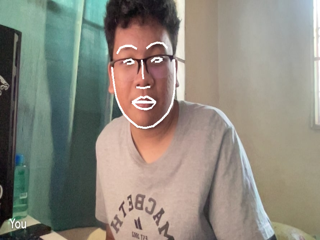

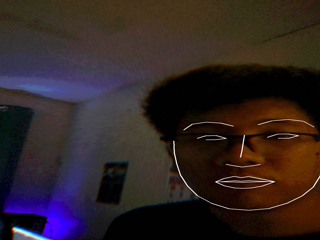

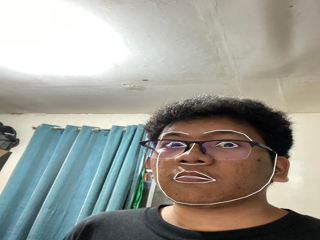

In [6]:
# We can try running them for sanity check
known_folder = "face_data"
known_images = load_face_data(known_folder)



Since my stupid monkey brain just triggered an OCD, I might as well improve the above code to use a database system.

Essentially, I make a folder of people's names and iterate through each folder, this makes data organisation easier and better.

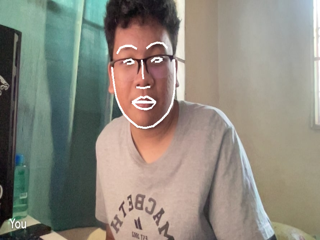

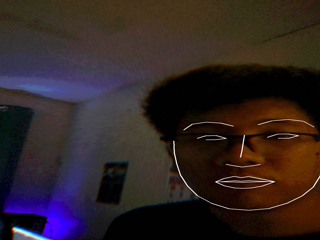

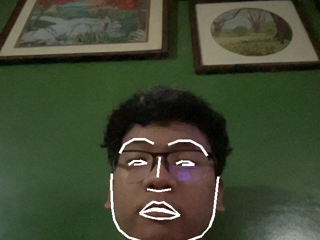

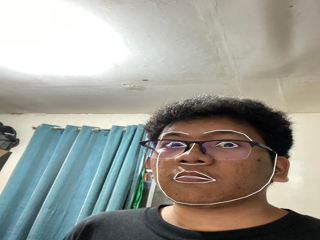

In [7]:
# Prepare the known person's database (folders containing images of known persons)
known_persons_folder = "face_data"

# Load and encode the images of known persons
known_persons_encodings = {}


for person_folder in os.listdir(known_persons_folder):
    try:
        person_images = load_face_data(os.path.join(known_persons_folder, person_folder))
        person_encodings = create_encodings(person_images)
        known_persons_encodings[person_folder] = person_encodings
    except:
        continue

Now, It looks like a disclosure album.

And now for the cream de la crop, Let's try and add in images that doesn't belong to the dataset; This should in theory recognize the image by their facial features.

In [8]:
def draw_box(image, locations, names):
    pil_image = Image.fromarray(image)
    # Create a Pillow ImageDraw Draw instance to draw with
    draw = ImageDraw.Draw(pil_image)
    print(draw)
    for (top, right, bottom, left), name in zip(locations, names):
        # Draw rectangle around the face
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)

        # Draw label with the name below the face
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(image, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)


In [9]:
def find_best_match(unknown_encoding, known_persons_encodings):
    best_match = None
    best_distance = float('inf')
    for person, person_encodings in known_persons_encodings.items():
        for encoding in person_encodings:
            matches = face_recognition.compare_faces([encoding], unknown_encoding)
            distance = face_recognition.face_distance([encoding], unknown_encoding)[0]
            best_match_index = np.argmin(distance)
            if matches[best_match_index]:
                best_distance = distance
                best_match = person
    return best_match

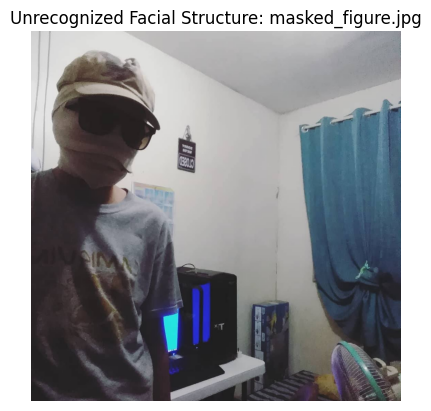

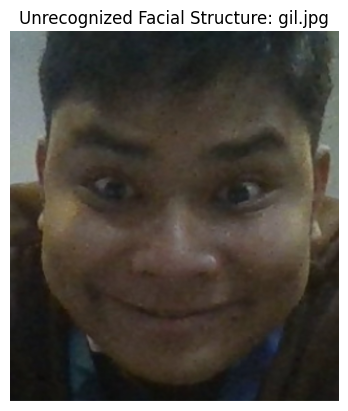

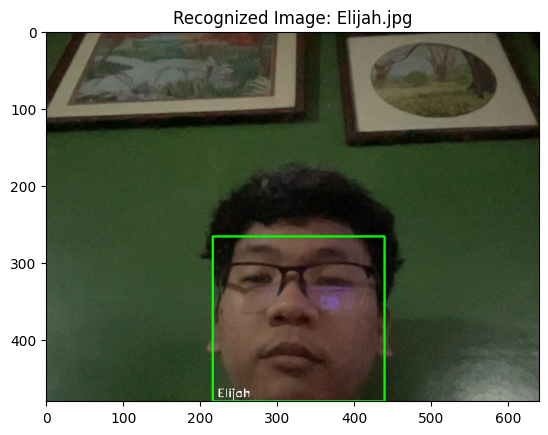

No match found for the unknown image {filename} in the known persons database.


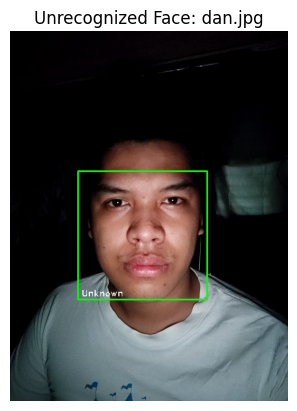

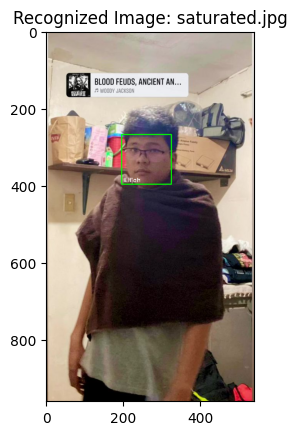

In [14]:
# I just can't be bothered with manually writing down the file names

# Unknown images folder
unknown_images_folder = "test_data"

for filename in os.listdir(unknown_images_folder):
    unknown_image_path = os.path.join(unknown_images_folder, filename)
    # Load and encode the unknown image
    unknown_image_path = os.path.join(unknown_images_folder, filename)

    # Load the unknown image
    unknown_image = face_recognition.load_image_file(unknown_image_path)
    try:
        # Find face locations in the unknown image
        face_locations = face_recognition.face_locations(unknown_image)
        
        # Encode the unknown image
        unknown_encoding = face_recognition.face_encodings(unknown_image, face_locations)

        # Compare the encodings and find the best match
        best_match = find_best_match(unknown_encoding[0], known_persons_encodings)

        if best_match:
            # Draw boxes and names on the recognized image
            # Use the copy method to prevent contaminating the old image data
            image_copy = unknown_image.copy()
            draw_box(image_copy, face_locations, [best_match])

            # Plot the recognized image
            plt.imshow(image_copy)
            plt.title(f"Recognized Image: {filename}")
            plt.axis('on')
            plt.show()
        else:
            print("No match found for the unknown image {filename} in the known persons database.")
            # Draw boxes on unrecognized image
            image_copy = unknown_image.copy()
            draw_box(image_copy, face_locations, ["Unknown"])

            # Plot the unrecognized image
            plt.imshow(image_copy)
            plt.title(f"Unrecognized Face: {filename}")
            plt.axis('off')
            plt.show()
    except IndexError:
        plt.imshow(unknown_image)
        plt.title(f"Unrecognized Facial Structure: {filename}")
        plt.axis('off')
        plt.show()
        continue
    

In [ ]:
# Load known face images and names

# Load know faces into face_encodings list
know_face_encodings = []
for image_path in known_face_images:
    image = face.recognition.load_image_file(image_path)
    face_encoding = face_recognition.face_encodings(image)[0]
    known_face_encodings.append(face_encoding)

# Initialize webcam
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame from the webcam
    ret, frame = video_capture.read()
    # Find face locations and encodings in the current frame
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Compare current face with known faces
        matches = faces_recognition.compare_faces(know_face_encodings, face_encoding)

        name = "Unkown"

         # Check if there is a match
        if True in matches:
            matched_index = matches.index(True)
            name = know_face_names[matched_index]
    
        # Draw rectangle and label for the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)
    
    # Display the resulting image
    cv2.imshow('Video', frame)
    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) & OxFF == ord('q'):
        break

# Release the webcam and close the window
video_capture.release()
cv2.destroyAllWindows()

Additionally, you can also use CNN to find faces inside and image.
This method is more accurate than the default HOG model, but it's slower, unless you have an nvidia GPU and dlib compiled with CUDA extensions. 
But if you do, this will use GPU acceleration and perform well.

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 228, Left: 196, Bottom: 464, Right: 431


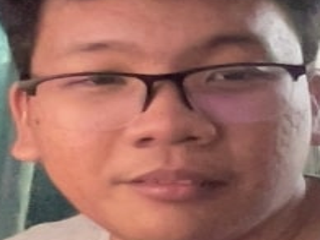

In [31]:
# Load the jpg file into a numpy array
image_path = os.path.join("face_data", "Elijah.jpg")
image = face_recognition.load_image_file(image_path)

# Find all the faces in the image using a pre-trained convolutional neural network.
# This method is more accurate than the default HOG model, but it's slower
# unless you have an nvidia GPU and dlib compiled with CUDA extensions. But if you do,
# this will use GPU acceleration and perform well.
# See also: find_faces_in_picture.py
face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    resized = pil_image.resize((320, 240))
    display(resized)

Here's the rundown of what's going on.

1. **Import Required Libraries**:
   - Import the necessary libraries for face recognition, image loading, and visualization. These libraries include `face_recognition`, `os`, `matplotlib.pyplot`, `matplotlib.image`, and `cv2` (OpenCV).

2. **Load Images and Create Encodings for Known Persons**:
   - Define functions `load_images_from_folder` and `create_encodings` to load images from folders and create facial encodings for each known person.
   - Provide the path to the folder containing images of known persons in the variable `known_persons_folder`.

3. **Find Best Match for Unknown Images**:
   - Define the function `find_best_match` that takes the encoding of an unknown image and the dictionary of known persons' encodings as input and returns the best match.
   - This function compares the encoding of the unknown image with the encodings of known persons using the Euclidean distance and returns the name of the best match.

4. **Draw Boxes and Names on Images**:
   - Define the function `draw_boxes_on_image` to draw boxes around the detected faces and display names below the faces.
   - This function takes the image, face locations, and names as input and modifies the image to add boxes and names on the recognized faces.

5. **Recognize Known and Unrecognized Images**:
   - Provide the path to the folder containing the unknown images in the variable `unknown_images_folder`.
   - Iterate through all the image files inside the unknown images folder.
   - For each unknown image, load the image, find face locations, and create facial encodings.
   - Compare the encodings with known persons' encodings to find the best match using the `find_best_match` function.
   - If a match is found, draw boxes and names on the recognized image using the `draw_boxes_on_image` function, and display the recognized image with the best match's name.
   - If no match is found, draw boxes on the unrecognized image and display it with the label "Unrecognized."

6. **Display Results**:
   - For each unknown image, print whether it belongs to a known person or is unrecognized.
   - Display the recognized or unrecognized image with boxes around the detected faces and the corresponding names.

7. **Adjust File Paths**:
   - Ensure that you replace the placeholder paths (e.g., "path/to/known_persons_database" and "path/to/unknown_images_folder") with the actual paths to your known persons' database and unknown images folder.
